## Social Computing: Notebook 2
# Using APIs

Please inlcude your names below and edit the name of the file to include the last names of the people answering

In [2]:
# Students: Oliver Hliddal, Julian Bolfing

In [3]:
import requests
import json
import os
import time

### 1. Google books (20 points total)
#### Setting the request URL parameters
You can set the parameters of the API request according to the documentation below. The first part of the request is always the same, and the "q" which stands for question will take various parameters. <br>
More documentation can be found at: https://developers.google.com/books/docs/v1/using?hl=vi#ids

<img width="50%" src=" 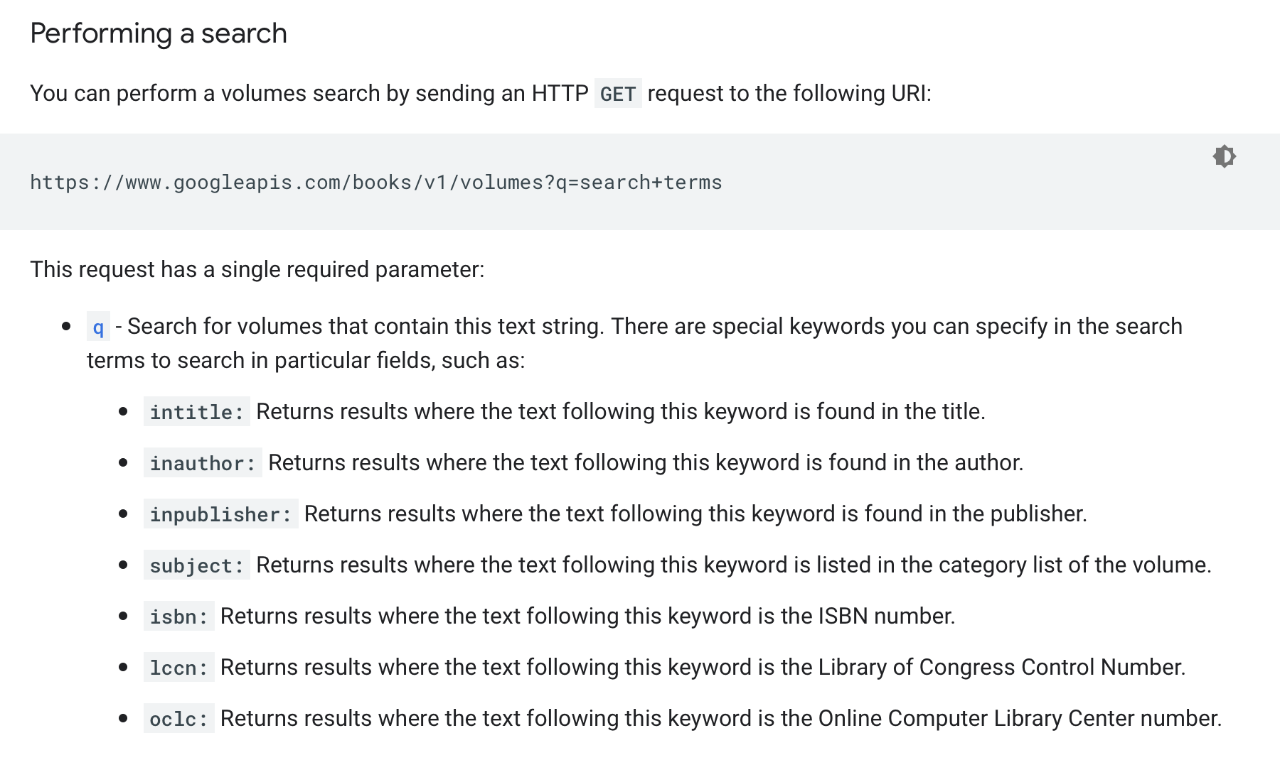"> </img>

**Example**: `https://www.googleapis.com/books/v1/volumes?q=isbn:0060529709` returns information about the book with the given ISBN number (Everything is illuminated by Jonathan Safran Foer).

**Exercise 1.1 (6 points)**

Using the above parameters create the following request URLs!
    1. Requesting books that have "potter" in the title
    2. Requesting books that have "doyle" as author
    3. With isbn "1904633684"
    4. With id "2bGdK8CRKoEC"
    5. Second result page when searching books that has "detective" listed in the category list
    6. Second result page when searching books that have "potter in the title but showing 40 results in one page, not 10. 
<br>

Try and see whether they work with `requests.get()`!

In [4]:
result_A = 'https://www.googleapis.com/books/v1/volumes?q=intitle:potter'
result_B = 'https://www.googleapis.com/books/v1/volumes?q=inauthor:doyle'
result_C = 'https://www.googleapis.com/books/v1/volumes?q=isbn:1904633684'
result_D = 'https://www.googleapis.com/books/v1/volumes?q=id:2bGdK8CRKoEC'
result_E = 'https://www.googleapis.com/books/v1/volumes?q=categories:detective&startIndex=10'
result_F = 'https://www.googleapis.com/books/v1/volumes?q=intitle:potter&maxResults=40&startIndex=40'

In [5]:
#check with requests
print(requests.get(result_A).text)
print(requests.get(result_B).text)
print(requests.get(result_C).text)
print(requests.get(result_D).text)
print(requests.get(result_E).text)
print(requests.get(result_F).text)

#continue to check all your URLs this way!

{
  "kind": "books#volumes",
  "totalItems": 200,
  "items": [
    {
      "kind": "books#volume",
      "id": "XvApAQAAMAAJ",
      "etag": "8+cptsgoW6M",
      "selfLink": "https://www.googleapis.com/books/v1/volumes/XvApAQAAMAAJ",
      "volumeInfo": {
        "title": "Harry Potter und der Stein der Weisen",
        "authors": [
          "Joanne K. Rowling"
        ],
        "publisher": "Carlsen Verlag GmbH",
        "publishedDate": "1998",
        "description": "Eigentlich hatte Harry geglaubt, er sei ein ganz normaler Junge. Zumindest bis zu seinem elften Geburtstag. Da erfährt er, dass er sich an der Schule für Hexerei und Zauberei einfinden soll. Und warum? Weil Harry ein Zauberer ist. Und so wird für Harry das erste Jahr in der Schule das spannendste, aufregendste und lustigste in seinem Leben. Er stürzt von einem Abenteuer in die nächste ungeheuerliche Geschichte, muss gegen Bestien, Mitschüler und Fabelwesen kämpfen. Da ist es gut, dass er schon Freunde gefunden hat, di

**Exercise 1.2. (14 points)** 

Define a function that sends a request to the google books API with the URL parameters as inputs to the function. Try to incorporate as many as the variables as possible and output a URL according to the settings you want to have. Don't forget to write a docstring explaning how the function works. Docstrings are explanations to functions, describing the input, output, and purpose of the function. If you haven't used them before, you can find more examples for example at: https://www.geeksforgeeks.org/python-docstrings/

In [6]:
def request_books_api(intitle="",inauthor="",inpublisher="",isbn="",lccn="",oclc="",startIndex="",maxResults="",printType="all",projection="full",orderBy="relevance",categories="",language=""):
    '''Returns api-request from google books based on parameters given.'''
    base_link="https://www.googleapis.com/books/v1/volumes?q="
    if (intitle!=""):
        base_link=base_link+"intitle:"+intitle+"&"
    if (inauthor!=""):
        base_link=base_link+"inauthor:"+inauthor+"&"
    if (inpublisher!=""):
        base_link=base_link+"inpublisher:"+inpublisher+"&"
    if (isbn!=""):
        base_link=base_link+"isbn:"+isbn+"&"
    if (lccn!=""):
        base_link=base_link+"lccn:"+lccn+"&"
    if (oclc!=""):
        base_link=base_link+"oclc:"+oclc+"&"
    if (startIndex!=""):
        base_link=base_link+"startIndex:"+startIndex+"&"
    if (maxResults!=""):
        base_link=base_link+"maxResults:"+maxResults+"&"
    if (categories!=""):
        base_link=base_link+"subject:"+categories+"&"
    if (language!=""):
        base_link=base_link+"language:"+language+"&"
    base_link=base_link+"printType:"+printType+"&"
    base_link=base_link+"projection:"+projection+"&"
    base_link=base_link+"orderBy:"+orderBy+"&"
    return requests.get(base_link)

In [7]:
## call your function here inside a print() statement
print(request_books_api(intitle="Potter").text)

{
  "kind": "books#volumes",
  "totalItems": 200,
  "items": [
    {
      "kind": "books#volume",
      "id": "XvApAQAAMAAJ",
      "etag": "/GUV6VlhBpY",
      "selfLink": "https://www.googleapis.com/books/v1/volumes/XvApAQAAMAAJ",
      "volumeInfo": {
        "title": "Harry Potter und der Stein der Weisen",
        "authors": [
          "Joanne K. Rowling"
        ],
        "publisher": "Carlsen Verlag GmbH",
        "publishedDate": "1998",
        "description": "Eigentlich hatte Harry geglaubt, er sei ein ganz normaler Junge. Zumindest bis zu seinem elften Geburtstag. Da erfährt er, dass er sich an der Schule für Hexerei und Zauberei einfinden soll. Und warum? Weil Harry ein Zauberer ist. Und so wird für Harry das erste Jahr in der Schule das spannendste, aufregendste und lustigste in seinem Leben. Er stürzt von einem Abenteuer in die nächste ungeheuerliche Geschichte, muss gegen Bestien, Mitschüler und Fabelwesen kämpfen. Da ist es gut, dass er schon Freunde gefunden hat, di

In [8]:
## test out your docstring here
print(request_books_api.__doc__)

Returns api-request from google books based on parameters given.


#### Useful knowledge: Status codes

Responses contain information even without looking into the textual content. printing the response tells us the URL we requested, the date, its status, the content type and the size of the response object

The most important for us is the status: it tells us whether our request has been successful: You can find a list of HTTP status codes here https://en.wikipedia.org/wiki/List_of_HTTP_status_codes.
Or, you can always check HTTP Status Cats: https://www.flickr.com/photos/girliemac/sets/72157628409467125

The most important status codes for us are:

- successful call: code 200
- client error: 4xx, e.g. 401: Unauthorized, 404: Not found
- server error: 5xx, e.g. 500: Internal Server Error, 502: Bad Gateway

### 2. Parsing json (40 points total)

**Exercise 2.1. (2 points)** 

Using the previously defined function, query the book with isbn number 1904633684 and print the text of the result. 

In [9]:
aRequest=request_books_api(isbn="1904633684")
print(aRequest.text)

{
  "kind": "books#volumes",
  "totalItems": 1,
  "items": [
    {
      "kind": "books#volume",
      "id": "tBasGxqDMbMC",
      "etag": "6yvUdKxPHY4",
      "selfLink": "https://www.googleapis.com/books/v1/volumes/tBasGxqDMbMC",
      "volumeInfo": {
        "title": "The Case-book of Sherlock Holmes",
        "authors": [
          "Arthur Conan Doyle"
        ],
        "publisher": "Collector's Library",
        "publishedDate": "2004",
        "description": ".0000000000The Casebook of Sherlock Holmes contains Conan Doyle's last twelve stories about his great fictional detective. Compared with earlier collections these tales are darker, exploring such themes as treachery, mutilation and the terrible consequences of infidelity, and containing such gothic touches as a blood-sucking vampire and crypts at midnight. With an Afterword by David Stuart Davies, a Fellow of the Royal Literary Fund, and an authority on Sherlock Holmes. He has written the Afterwords for all the Collector's 

**Exercise 2.2. (2 points)** 

Now load the previous response into a json object.:

In [10]:
aJSON = aRequest.json()

**Exercise 2.3. (2 points)** 

What are the highest level keys of the json object?

In [11]:
keys=aJSON.keys()
print(keys)

dict_keys(['kind', 'totalItems', 'items'])


**Exercise 2.4. (1 point)** 

What is the type of the value of 'items' key?

In [12]:
print(type(aJSON["items"]))

<class 'list'>


**Exercise 2.5. (9 points)** 

Parse the following information from the json object

In [13]:
### Total number of items returned by the request
print(aJSON["totalItems"])

### Title of the book
print(aJSON["items"][0]["volumeInfo"]["title"])

### Authors of the book
print(aJSON["items"][0].get("volumeInfo").get("authors"))

### Date of publishing
print(aJSON["items"][0].get("volumeInfo").get("publishedDate"))

### Page Count
print(aJSON["items"][0].get("volumeInfo").get("pageCount"))

### Categories
print(aJSON["items"][0].get("volumeInfo").get("categories"))

### Average Rating
print(aJSON["items"][0].get("volumeInfo").get("averageRating"))

### Rating Count
print(aJSON["items"][0].get("volumeInfo").get("ratingsCount"))

### Is it avaliable as Epublication (Epub)
print(aJSON["items"][0].get("accessInfo").get("epub").get("isAvailable"))

1
The Case-book of Sherlock Holmes
['Arthur Conan Doyle']
2004
316
['Criminal investigation']
4.5
6
False


**Exercise 2.6. (6 points)** 

Unlike in the case of requesting books by IDs, the requests in which you search for author or title usually have more than one book as a result. Try searching for books that contain a specific word in their title. Once you obtain the result of the request as a json object, loop through all books in the json and print out the **title** of all the books. 

In [14]:
aRequest2=request_books_api(intitle="Stone")
bookList=aRequest2.json()
for book in bookList["items"]:
    print(book.get("volumeInfo").get("title"))

Dr. Stone 1
Flesh and Stone: The Body and the City in Western Civilization
Stick and Stone
Silver, Sword, and Stone
Art of Stone Painting
The Wretched Stone
Stone Soup
The New Rolling Stone Album Guide
Cutting for Stone
Minoan Stone Vases


**Exercise 2.7. (9 points)** 

Now search for books by category and print out the authors

In [15]:
aRequest3=request_books_api(categories="Romance")
bookList2=aRequest3.json()
for book in bookList2["items"]:
    print(book.get("volumeInfo").get("authors"))

['Kelsey Rodkey']
['Maeve Binchy']
['Tennessee Williams']
['Jude Deveraux']
['Catherine Bybee']
['Donna Clayton']
['Carolyn Keene']
['Francine Pascal', 'Kate William']
['Fern Michaels']
['Emma Darcy']


**Exercise 2.8. (9 points)** 

Define a function that given an item in the json object (the meta information about one book) returns a list with the following attributes: `title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub`. 
<br>
Note that **not** every book has all the features required. If a piece of information is missing, your code should write NaN instead in place of the value. 

In [16]:
def checkNaN(x):
    '''Checks if object x is of NoneType. Returns string "NaN" if true, the object x if false.'''
    if(x==None):
        return "NaN"
    return x

def parse_json(j):
    '''The function takes a book item as an input and returns a list of the extracted features.'''
    title=checkNaN(j.get("volumeInfo").get("title"))
    authors=checkNaN(j.get("volumeInfo").get("authors"))
    publishedDate=checkNaN(j.get("volumeInfo").get("publishedDate"))
    pageCount=checkNaN(j.get("volumeInfo").get("pageCount"))
    categories=checkNaN(j.get("volumeInfo").get("categories"))
    averageRating=checkNaN(j.get("volumeInfo").get("averageRating"))
    ratingsCount=checkNaN(j.get("volumeInfo").get("ratingsCount"))
    epub=checkNaN(j.get("accessInfo").get("epub").get("isAvailable"))

    return title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub


aRequest4=request_books_api(intitle="Harry Potter").json()
#Returns the values of the first book, with the variables having values.
print(parse_json(aRequest4["items"][0]))
#Returns the values of the second book, with some of the variables not having a value.
print(parse_json(aRequest4["items"][1]))

('Harry Potter und der Stein der Weisen', ['Joanne K. Rowling'], '1998', 346, ["Children's literature, English"], 5, 2, False)
('Harry Potter 1 und der Stein der Weisen. Schmuckausgabe', ['Joanne K. Rowling'], '2015-10-06', 245, ['Juvenile Fiction'], 'NaN', 'NaN', False)


### 3. New York Times API (40 points total)

Your task in this exercise will be to compare the amount of Chatbot, NFT, Corona, NATO related articles in the last 12 months, using an API that the New York Times provides. 

Start with creating an API key on the NYT API website. As you can see there are multiple functionalities/APIs that the NYT provides. For this exercise we will use the one that allows you to search among articles. so when you sign up for the API key, make sure to pick that one. 

Here's the documentation for using this API, it explains the syntacs of queries: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

**Exercise 3.1. (2 points)** 

How can you specify a keyword to search for in the URL?

In [17]:
## /articlesearch.json?q=KEYWORD
print(requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=dStQ04EXmMRGkeBAGsWjGACwZI4gLN1I").text)

{"status":"OK","copyright":"Copyright (c) 2023 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"Peter Obi was until recently a secondary player in Nigerian politics. By switching parties and appealing to the digitally savvy, he overturned the old order.","web_url":"https://www.nytimes.com/2023/02/28/world/africa/peter-obi-nigeria-election.html","snippet":"Peter Obi was until recently a secondary player in Nigerian politics. By switching parties and appealing to the digitally savvy, he overturned the old order.","lead_paragraph":"Nine months ago, Peter Obi was a member of Nigeria’s main opposition party, the People’s Democratic Party, and one of the 15 presidential aspirants cleared for its ticket. As a former state governor, he stood solidly in the ranks of the political establishment.","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2023/02/27/multimedia/00nigeria-obi-1

**Exercise 3.2. (4 points)** 

How can you specify a date or multiple dates to search for?

In [18]:
## for a date range: begin_date=20220316&end_date=20220317
## for specific dates: fq=pub_date:(2022-03-16 OR 2022-03-17)
print(requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&begin_date=20220316&end_date=20220317&api-key=dStQ04EXmMRGkeBAGsWjGACwZI4gLN1I").text)
print(requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&fq=pub_date:(2022-03-16%20OR%202022-03-17)&api-key=dStQ04EXmMRGkeBAGsWjGACwZI4gLN1I").text)

{"status":"OK","copyright":"Copyright (c) 2023 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"Years ago, voters created a commission to make political maps fairer. Now the State Supreme Court is blocking maps drawn by the Republican-led commission, saying nothing has changed.","web_url":"https://www.nytimes.com/2022/03/17/us/politics/ohio-court-congress-maps.html","snippet":"Years ago, voters created a commission to make political maps fairer. Now the State Supreme Court is blocking maps drawn by the Republican-led commission, saying nothing has changed.","lead_paragraph":"A bipartisan majority of Ohio Supreme Court justices has ratcheted up an extraordinary legal standoff over the state’s political boundaries, rejecting — for the third time in barely two months — new maps of state legislative districts that heavily favor the Republican Party.","print_section":"A","print_page":"15","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlar

**Exercise 3.3. (4 points)** 

Write a function that takes a search term, and two dates as an input, and returns a correct search query you can use for an API as an output

In [19]:
def getNYT (term,date1,date2):
    baseLink="https://api.nytimes.com/svc/search/v2/articlesearch.json?"
    link=baseLink+"q="+term+"&fq=pub_date:("+date1+"%20OR%20"+date2+")&api-key=dStQ04EXmMRGkeBAGsWjGACwZI4gLN1I"
    aRequest=requests.get(link)
    return(aRequest)

print(getNYT("election","2022-02-28","2022-02-27").text)

{"status":"OK","copyright":"Copyright (c) 2023 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"William P. Barr’s memoir of his time as attorney general under George H.W. Bush and then again under Donald J. Trump defends his more recent leadership of the Justice Department.","web_url":"https://www.nytimes.com/2022/02/27/us/politics/bill-barr-trump-january-6.html","snippet":"William P. Barr’s memoir of his time as attorney general under George H.W. Bush and then again under Donald J. Trump defends his more recent leadership of the Justice Department.","lead_paragraph":"WASHINGTON — Former Attorney General William P. Barr writes in a new memoir that former President Donald J. Trump’s “self-indulgence and lack of self-control” cost him the 2020 election and says “the absurd lengths to which he took his ‘stolen election’ claim led to the rioting on Capitol Hill.”","print_section":"A","print_page":"17","source":"The New York Times","multimedia":[{"rank":0,"

**Exercise 3.4. (20 points)** 

Write a function that takes a query to the API as an input and returns the number of hits (number of article results) that this query returns. Make sure that you are getting the total number of articles for the time period. Use this function to collect the number of hits for each search term we are interested in (Chatbot, NFT, Corona, NATO) for each time periods of interest.

Hint: Function suddenly returning 0? You might need to delay the queries you are making to the API. You could use time.sleep() function.

In [26]:
def getAmountNYT(term,startdate,enddate):
    baseLink="https://api.nytimes.com/svc/search/v2/articlesearch.json?"
    link=baseLink+"q="+term+"&begin_date="+startdate+"&end_date="+enddate+"&api-key=dStQ04EXmMRGkeBAGsWjGACwZI4gLN1I"
    aRequest=requests.get(link).json()
    #Catch error responses
    try:
        return(aRequest["response"]["meta"]["hits"])
    except:
        print("Error response! "+aRequest["fault"]["faultstring"])
        return(None)

In [21]:
print(getAmountNYT("Chatbot","20220317","20230316"))
print(getAmountNYT("NFT","20220317","20230316"))
print(getAmountNYT("Corona","20220317","20230316"))
print(getAmountNYT("NATO","20220317","20230316"))

202
179
116
1290


**Exercise 3.5. (10 points)** 

Remember, that our original question was how the appearance of 4 topics changed over time in the last 6 months. Now we have all the pieces to do this - some written by you, plus the visualisation code provided by us below. Visualise the change in the number of articles over the last 6 months. Then, write a short text interpreting the graph - what trends do you see? What could be reasons for these trends?

In [ ]:
import time

# takes around 2min30sec

def try_req(topic, sDate, eDate):
    for delay in [5, 20, 60]:
        time.sleep(delay)
        try:
            return getAmountNYT(topic, sDate, eDate)
        except:
            pass
    return 0

CBSep = try_req("Chatbot","20220901","20220930")
CBOct = try_req("Chatbot","20221001","20221031")
CBNov = try_req("Chatbot","20221101","20221130")
CBDez = try_req("Chatbot","20221201","20221231")
CBJan = try_req("Chatbot","20230101","20230131")
CBFeb = try_req("Chatbot","20230201","20230228")

NFTSep = try_req("NFT","20220901","20220930")
NFTOct = try_req("NFT","20221001","20221031")
NFTNov = try_req("NFT","20221101","20221130")
NFTDez = try_req("NFT","20221201","20221231")
NFTJan = try_req("NFT","20230101","20230131")
NFTFeb = try_req("NFT","20230201","20230228")

CoSep = try_req("Corona","20220901","20220930")
CoOct = try_req("Corona","20221001","20221031")
CoNov = try_req("Corona","20221101","20221130")
CoDez = try_req("Corona","20221201","20221231")
CoJan = try_req("Corona","20230101","20230131")
CoFeb = try_req("Corona","20230201","20230228")

NaSep = try_req("NATO","20220901","20220930")
NaOct = try_req("NATO","20221001","20221031")
NaNov = try_req("NATO","20221101","20221130")
NaDez = try_req("NATO","20221201","20221231")
NaJan = try_req("NATO","20230101","20230131")
NaFeb = try_req("NATO","20230201","20230228")


dict_results2 = {'Chatbot':[CBSep, CBOct, CBNov, CBDez, CBJan, CBFeb],
                 'NFT':[NFTSep, NFTOct, NFTNov, NFTDez, NFTJan, NFTFeb],
                 'Corona':[CoSep, CoOct, CoNov, CoDez, CoJan, CoFeb],
                 'NATO':[NaSep, NaOct, NaNov, NaDez, NaJan, NaFeb]
                }




In [23]:
# Chatbot: The appearance of Chatbot increased substantially, especially in the past 3 months.
    # This might be mostly due to the new chatbots like ChatGPT which got a lot of attention.
    
# NFT: The appearance of NFT was rather constant during the last 6 month, without a clear trend.

# Corona: The appearance of Corona was rather constant during the last 6 months, without a clear thrend, 
    # but a slight peak in december which could be related to increased relevance due to christmas season.
    
# Nato: The appearance of Nato was very high in general during the last 6 months, compared to the other 3 terms.
    # There was a slight trend of increasing over the past 6 months, 
    # leading to peaks close to 100 in the last 2 months.

#### Visualization

To help you out with the visualization, we have created the code below. In the description of the function you can find instructions on how to use it. There is also an example of a call underneath the function.

You need to give two parameters to the function. The first one is a dictionary where the keys are the three search query terms that you have used (given as a string); for each term there is one list with the number of queries per each time-block considered. The second parameter is a list of strings with the names of the time periods being considered. 

Important note: the lengths of the lists must match. It is assumed that for each query there is a vector having the number of hits per each period specified in the list of the second parameter. This means that the three lists in the dictionary and the list given as the second parameter must have equal lengths.

{'Chatbot': [3, 1, 0, 25, 42, 81], 'NFT': [8, 12, 10, 13, 5, 9], 'Corona': [5, 8, 11, 20, 13, 7], 'NATO': [74, 85, 68, 68, 96, 98]}


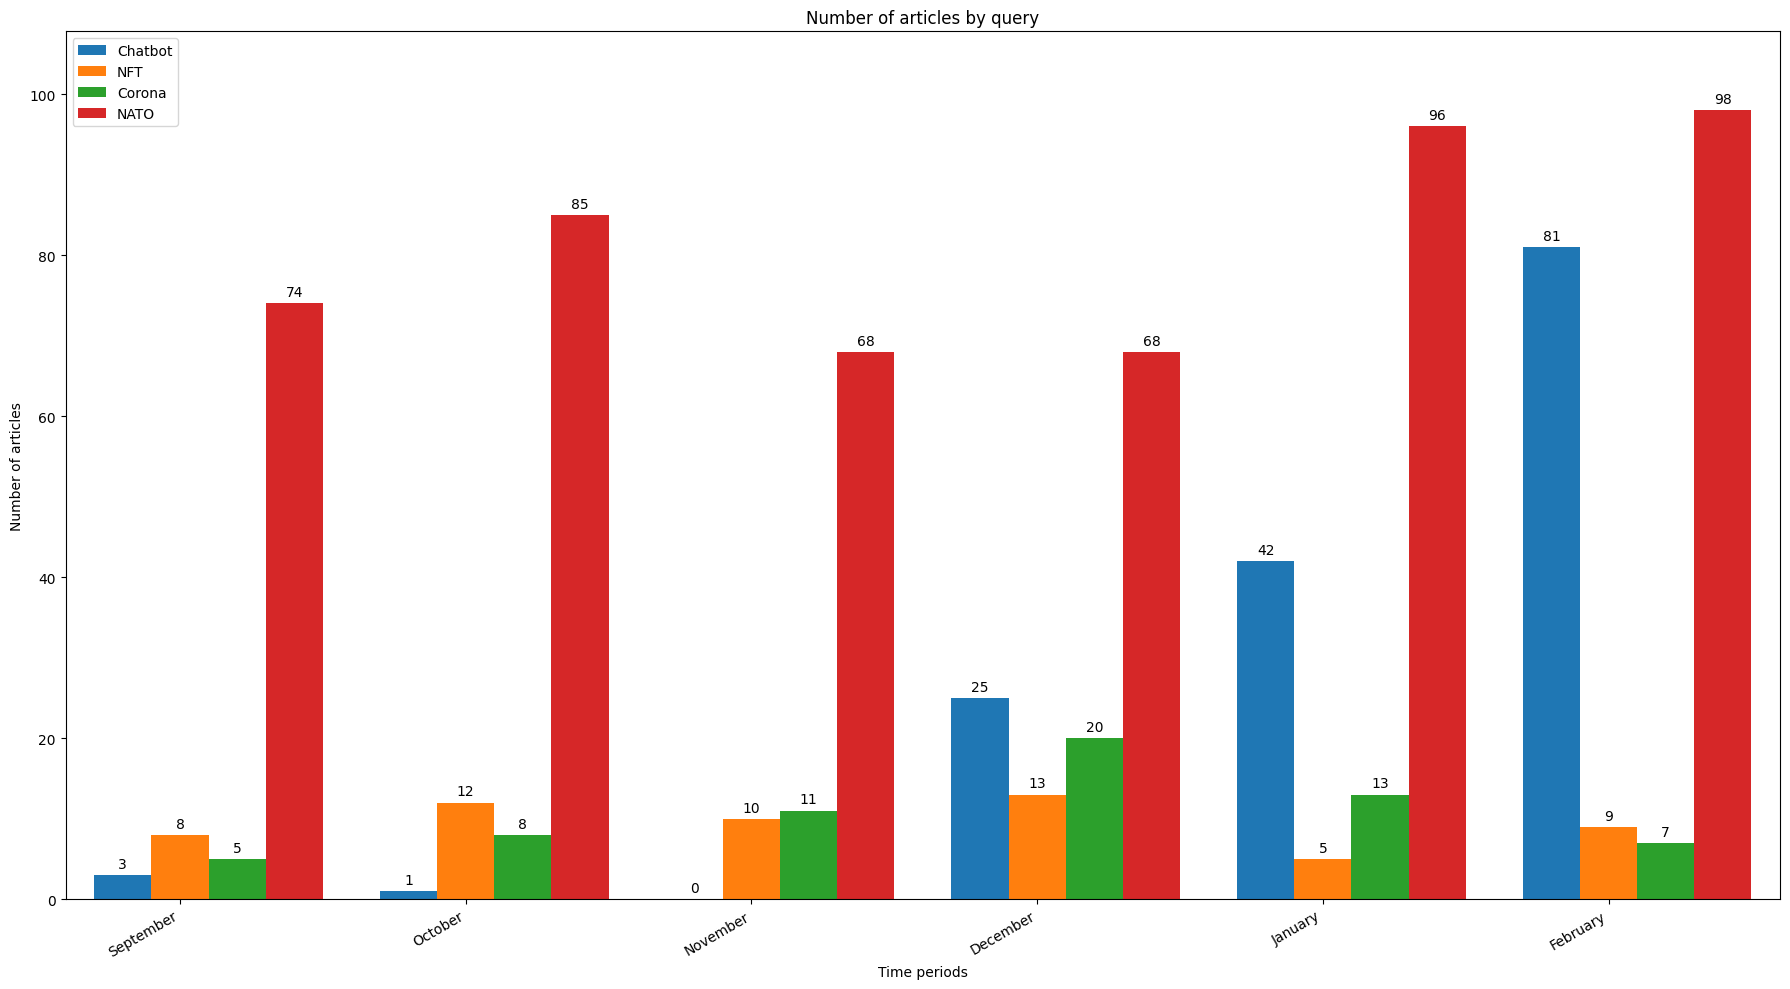

In [28]:
# This is a pre-implemented function for crating the visualisation
# You don't have to modify this

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    list_3 = d[query_terms[3]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.2
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,10))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])
    rects4 = ax.bar(x + 2*width, list_3, width, label=query_terms[3])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+3*width
    ymin = 0
    ymax = max(list_0+list_1+list_2+list_3)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()

# Below there is one example of how to use the above plot function
#dict_results2 = {'Chatbot':[250, 200], 'NFT':[100, 75], 'Corona':[300, 400], 'NATO':[50, 340]}
#plot_no_articles(dict_results2, ['February', 'March'])
print(dict_results2)
plot_no_articles(dict_results2, ['September', 'October', 'November', 'December', 'January', 'February'])
